In [15]:
train_dir = './Data//paddy-disease-classification/train_images/'
test_dir  = './Data/paddy-disease-classification/test_images/'

import glob

%matplotlib inline
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [5]:
BATCH_SIZE = 8
IMG_DIM = 256

In [8]:
img_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0 / 255.0,
    validation_split = .1,
    rotation_range = 5,
    shear_range = .3,
    zoom_range = .3,
    width_shift_range = .05,
    height_shift_range = .05,
    horizontal_flip = True,
    vertical_flip = True)

In [9]:
train_gen = img_datagen.flow_from_directory(
    train_dir,
    subset = 'training',
    seed = 42,
    target_size = (IMG_DIM, IMG_DIM),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical')

Found 9371 images belonging to 10 classes.


In [10]:
valid_gen = img_datagen.flow_from_directory(
    train_dir,
    subset = 'validation',
    seed = 42,
    target_size = (IMG_DIM, IMG_DIM),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical')

Found 1036 images belonging to 10 classes.


In [12]:
print(train_gen.class_indices)

print(len(train_gen.class_indices))

{'bacterial_leaf_blight': 0, 'bacterial_leaf_streak': 1, 'bacterial_panicle_blight': 2, 'blast': 3, 'brown_spot': 4, 'dead_heart': 5, 'downy_mildew': 6, 'hispa': 7, 'normal': 8, 'tungro': 9}
10


In [14]:
model = tf.keras.Sequential([
    InputLayer(input_shape = (IMG_DIM, IMG_DIM, 3)),
    Conv2D(16, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    
    Dense(8192, activation = 'relu'),
    Dense(1024, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(len(train_gen.class_indices), activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

In [16]:
EPOCHS = 30

model.compile(optimizer =Adam(3e-4),
             loss = 'categorical_crossentropy',
             metrics = ['acc'])
hist = model.fit(train_gen,
                epochs = EPOCHS,
                validation_data = valid_gen)

Epoch 1/30
1172/1172 [==============================] - 164s 135ms/step - loss: 2.0136 - acc: 0.2762 - val_loss: 1.7580 - val_acc: 0.3880
Epoch 2/30
1172/1172 [==============================] - 156s 133ms/step - loss: 1.6593 - acc: 0.4135 - val_loss: 1.5166 - val_acc: 0.4672
Epoch 3/30
1172/1172 [==============================] - 155s 133ms/step - loss: 1.3764 - acc: 0.5163 - val_loss: 1.2544 - val_acc: 0.5618
Epoch 4/30
1172/1172 [==============================] - 158s 135ms/step - loss: 1.1557 - acc: 0.6013 - val_loss: 1.0338 - val_acc: 0.6371
Epoch 5/30
1172/1172 [==============================] - 158s 134ms/step - loss: 0.9314 - acc: 0.6835 - val_loss: 0.8869 - val_acc: 0.7133
Epoch 6/30
1172/1172 [==============================] - 156s 133ms/step - loss: 0.7658 - acc: 0.7461 - val_loss: 0.8389 - val_acc: 0.7317
Epoch 7/30
1172/1172 [==============================] - 159s 135ms/step - loss: 0.6466 - acc: 0.7839 - val_loss: 0.6621 - val_acc: 0.7905
Epoch 8/30
1172/1172 [============

[]

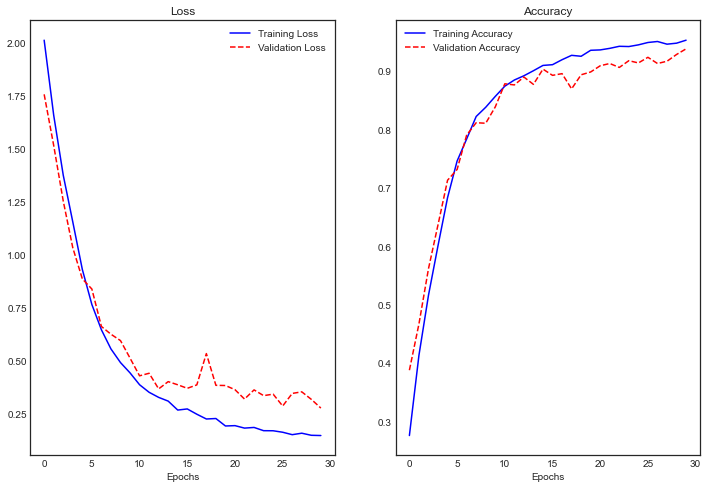

In [19]:
plt.figure(figsize = (12, 8))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), hist.history['loss'], 'b-', label = 'Training Loss')
plt.plot(range(EPOCHS), hist.history['val_loss'], 'r--', label = 'Validation Loss')
plt.xlabel("Epochs")
plt.title("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), hist.history['acc'], 'b-', label = 'Training Accuracy')
plt.plot(range(EPOCHS), hist.history['val_acc'], 'r--', label = 'Validation Accuracy')
plt.xlabel("Epochs")
plt.title("Accuracy")
plt.legend()
plt.plot()

In [22]:
test_dir = "./Data/paddy-disease-classification/test_images"

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0 / 255.0).flow_from_directory(
    directory = test_dir,
    target_size = (IMG_DIM, IMG_DIM),
    batch_size = BATCH_SIZE,
    classes = ['.'],
    shuffle = False
)

Found 3469 images belonging to 1 classes.


In [24]:
predict = model.predict(test_gen, verbose = 1)
predict_class = np.argmax(predict, axis = 1)
print(set(predict_class))

inv_map = {v:k for k, v in train_gen.class_indices.items()}

predictions = [inv_map[k] for k in predict_class]

predictions

434/434 [==============================] - 19s 43ms/step
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


['hispa',
 'normal',
 'blast',
 'blast',
 'blast',
 'brown_spot',
 'dead_heart',
 'brown_spot',
 'hispa',
 'normal',
 'dead_heart',
 'hispa',
 'normal',
 'dead_heart',
 'normal',
 'blast',
 'tungro',
 'hispa',
 'dead_heart',
 'dead_heart',
 'dead_heart',
 'tungro',
 'bacterial_leaf_blight',
 'dead_heart',
 'blast',
 'hispa',
 'blast',
 'brown_spot',
 'dead_heart',
 'bacterial_leaf_streak',
 'hispa',
 'dead_heart',
 'brown_spot',
 'brown_spot',
 'dead_heart',
 'hispa',
 'bacterial_leaf_blight',
 'tungro',
 'dead_heart',
 'tungro',
 'tungro',
 'brown_spot',
 'bacterial_leaf_streak',
 'hispa',
 'bacterial_leaf_blight',
 'bacterial_leaf_blight',
 'blast',
 'brown_spot',
 'bacterial_panicle_blight',
 'dead_heart',
 'blast',
 'tungro',
 'bacterial_leaf_blight',
 'normal',
 'hispa',
 'dead_heart',
 'hispa',
 'tungro',
 'bacterial_leaf_blight',
 'hispa',
 'dead_heart',
 'tungro',
 'tungro',
 'tungro',
 'brown_spot',
 'tungro',
 'brown_spot',
 'bacterial_leaf_streak',
 'dead_heart',
 'dead_hear

In [62]:
train_gen.class_indices.items()

dict_items([('bacterial_leaf_blight', 0), ('bacterial_leaf_streak', 1), ('bacterial_panicle_blight', 2), ('blast', 3), ('brown_spot', 4), ('dead_heart', 5), ('downy_mildew', 6), ('hispa', 7), ('normal', 8), ('tungro', 9)])

In [50]:
inv_map

{0: 'bacterial_leaf_blight',
 1: 'bacterial_leaf_streak',
 2: 'bacterial_panicle_blight',
 3: 'blast',
 4: 'brown_spot',
 5: 'dead_heart',
 6: 'downy_mildew',
 7: 'hispa',
 8: 'normal',
 9: 'tungro'}

In [45]:
filenames = test_gen.filenames

submission = pd.DataFrame({"image_id" : filenames, "label" : predictions})
submission.image_id = submission.image_id.str[2:]
submission.to_csv("submission_simplecnn.csv", index = False)
submission.head()

,image_id,label
0,200001.jpg,hispa
1,200002.jpg,normal
2,200003.jpg,blast
3,200004.jpg,blast
4,200005.jpg,blast
